# Итоговый проект. Очистка, подгрузка и визуализация данных. Non-alcohol fatty liver disease (NAFLD)

Быстрые ссылки \
Датасет + прочие ноутбуки: https://www.kaggle.com/datasets/utkarshx27/non-alcohol-fatty-liver-disease/data \
Задание SF: https://apps.skillfactory.ru/learning/course/course-v1:skillfactory+DSMED-3+2025/block-v1:skillfactory+DSMED-3+2025+type@sequential+block@b7beb9c209494d02b99dfa481c006d54/block-v1:skillfactory+DSMED-3+2025+type@vertical+block@b2bc6e6a775e443092747e52ac7bcc9d \
Прошлый проект SNA: https://colab.research.google.com/drive/1W5u7SfynglNmjxAJdQImV2MidcuMNdj1?authuser=1&hl=ru#scrollTo=GCL_LX2ZxjAY \
Пример анализа датасета EDA с каггл: \
https://www.kaggle.com/code/steffip/eda-non-alcohol-fatty-liver-disease \
Лекция на ютубе про нежировую болезнь печени: \
https://www.youtube.com/watch?v=KLWVF8tHWi0

**Контекст:** вы работаете аналитиком в научной группе, занимающейся изучением неалкогольной жировой болезни печени (НАЖБП). Вам поступил табличный набор данных, содержащий информацию о пациентах и факторах, связанных с развитием этого заболевания.

**Задача:** провести анализ предоставленных датасетов, визуализировать основные зависимости и закономерности, выполнить очистку и сделать выводы на основе проведённого исследования

**Цели проекта:**

1. Выполнить базовый анализ предоставленного табличного набора данных.
2. Выполнить предварительную очистку данных.
3. Построить визуализации для выявления закономерностей и аномалий.
4. Сформулировать выводы.

## Исходные данные
Ссылка на датасет Non-alcohol fatty liver disease (NAFLD):\
https://www.kaggle.com/datasets/utkarshx27/non-alcohol-fatty-liver-disease/data

### nafld1

id — идентификатор субъекта в исследовании;\
age — возраст при поступлении на обследование;\
male — пол (0 — женский, 1 — мужской);\
weight — вес в кг;\
height — рост в см;\
bmi — индекс массы тела; \
case.id — идентификатор случая НАЖБП, который соответствует этот объект;\
futime — прошедшее время до последнего наблюдения или смерти, в днях;\
status — статус пациента (1 — умерший, 0 — живой на момент последнего визита).

### nafld2

id — идентификатор субъекта;\
days — дни с даты индексирования;\
test — тип записанного значения;\
value — числовое значение.

### nwtco

seqno — порядковый номер записи;\
instit — код учреждения;\
histol — гистологический тип опухоли (histology);\
stage — стадия опухоли (tumor stage);\
study — код исследования (study);\
rel — статус рецидива (relalise status);\
edrel — время до рецидива;\
age — возраст пациента на момент обследования или постановки диагноза;\
in.subcohort — принадлежность к подгруппе когорты (1 — пациент включен в подгруппу исследования, 0 — нет).


## 1.Подгрузка данных и базовое знакомство в ними

Задание: \
- Проанализируйте структуру и содержимое файлов. Загрузите три предоставленных датасета, изучите их структуру, размерность и формат. \
- Проверьте пропуски. Посмотрите на количество пропущенных значений для каждого признака в каждом файле, для наглядности можно их визуализировать; здесь же составьте стратегию дальнейшей обработки пропусков. \
- Рассчитайте основные статистики для числовых и категориальных признаков, проверьте наличие выбросов и зафиксируйте результаты в виде небольшого текстового вывода.

### Подгрузка и анализ первого датасета

In [ ]:
# подгрузка необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
#подгрузка и изучение первого датасета
df_nafld1 = pd.read_csv('/content/drive/MyDrive/HW Visualization Non-alcohol fatty liver disease (NAFLD) file archive/nafld1.csv')

In [ ]:
#голова таблицы
display(df_nafld1.head())

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
0,3631,1,57,0,60.0,163.0,22.690939,10630.0,6261,0
1,8458,2,67,0,70.4,168.0,24.884028,14817.0,624,0
2,6298,3,53,1,105.8,186.0,30.453537,3.0,1783,0
3,15398,4,56,1,109.3,170.0,37.830100,6628.0,3143,0
4,13261,5,68,1,NaN,NaN,NaN,1871.0,1836,1


In [ ]:
#хвост таблицы
display(df_nafld1.tail())

,Unnamed: 0,id,age,male,weight,height,bmi,case.id,futime,status
17544,11130,17562,46,0,53.0,161.0,20.501023,12713.0,1894,0
17545,1099,17563,52,1,111.8,154.0,47.335905,17563.0,3841,0
17546,1522,17564,59,0,57.3,NaN,NaN,16164.0,5081,0
17547,5764,17565,61,0,NaN,NaN,NaN,17276.0,3627,1
17548,6658,17566,69,1,94.1,180.0,29.204650,2017.0,2744,0


In [ ]:
#размер таблицы
df_nafld1.shape

(17549, 10)

In [ ]:
#краткая характеристика всех колонок
df_nafld1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17549 entries, 0 to 17548
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17549 non-null  int64  
 1   id          17549 non-null  int64  
 2   age         17549 non-null  int64  
 3   male        17549 non-null  int64  
 4   weight      12763 non-null  float64
 5   height      14381 non-null  float64
 6   bmi         12588 non-null  float64
 7   case.id     17518 non-null  float64
 8   futime      17549 non-null  int64  
 9   status      17549 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.3 MB


Набор данных содержит 17549 строк и 10 столбцов. \
Все столбцы с числовыми значениями, кроме двух с категориальными значениями (male и status). Значения в стобцах int64 и float64 типов.
В основном нас интересует показатель status. Мы будем изучать, как остальные параметры на него влияют

In [ ]:
#проверка на пустые ячейки (кол-во пустых)
df_nafld1.isna().sum()

,0
Unnamed: 0,0
id,0
age,0
male,0
weight,4786
height,3168
bmi,4961
case.id,31
futime,0
status,0


Столбцы weight, height, bmi, case.id имеют пустые ячейки

In [ ]:
#оценим пропуски в процентах от общего кол-ва
(df_nafld1.isnull().sum() / len(df_nafld1) * 100).round(2)

,0
Unnamed: 0,0.00
id,0.00
age,0.00
male,0.00
weight,27.27
height,18.05
bmi,28.27
case.id,0.18
futime,0.00
status,0.00


Значения height содержит 18 % пропусков. Кол-во проспусков в колонках weight и bmi превышает 25%

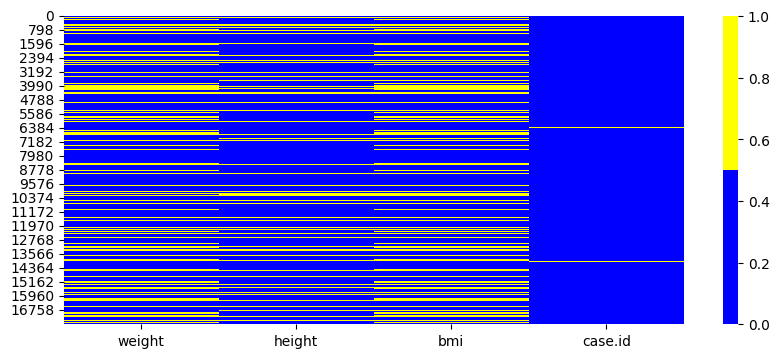

In [ ]:
#Построим теловую карту пропусков до очистки и дозаполнения полей
colors = ['blue', 'yellow']
fig = plt.figure(figsize=(10, 4))
cols = ['weight', 'height', 'bmi', 'case.id']
ax = sns.heatmap(
    df_nafld1[cols].isnull(),
    cmap=sns.color_palette(colors),
)

На тепловой карте можно увидеть, что если не хватает значения веса или роста, то и не хватает значения ИМТ

In [ ]:
# Проверим каждую колонку на уникальность
results = []
for column in df_nafld1.columns:
    results.append({
        'Column': column,
        'Is Unique': df_nafld1[column].is_unique
    })

result_df = pd.DataFrame(results)
print(result_df)

       Column  Is Unique
0  Unnamed: 0       True
1          id       True
2         age      False
3        male      False
4      weight      False
5      height      False
6         bmi      False
7     case.id      False
8      futime      False
9      status      False


Колонки Unnamed: 0 и id уникальны. Остальные колонки содержат повторяющиеся значения

In [ ]:
#Посчитаем основные показатели по колонкам
df_nafld1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,17549.0,8780.106046,5070.539328,1.000000,4389.000000,8778.000000,13171.000000,17566.000000
id,17549.0,8784.215967,5070.970712,1.000000,4393.000000,8786.000000,13175.000000,17566.000000
age,17549.0,52.659639,14.722515,18.000000,42.000000,53.000000,63.000000,98.000000
male,17549.0,0.467320,0.498945,0.000000,0.000000,0.000000,1.000000,1.000000
weight,12763.0,86.353350,22.239458,33.400000,70.000000,83.900000,99.200000,181.700000
height,14381.0,169.434949,10.141421,123.000000,162.000000,169.000000,177.000000,215.000000
bmi,12588.0,30.073865,7.085435,9.207332,25.136434,28.875884,33.710372,84.395725
case.id,17518.0,8840.924478,5051.334075,3.000000,4598.000000,8781.000000,13249.000000,17563.000000
futime,17549.0,2410.600547,1573.017638,7.000000,1132.000000,2148.000000,3353.000000,7268.000000
status,17549.0,0.077725,0.267746,0.000000,0.000000,0.000000,0.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'status'}>],
       [<Axes: title={'center': 'futime'}>, <Axes: >, <Axes: >]],
      dtype=object)

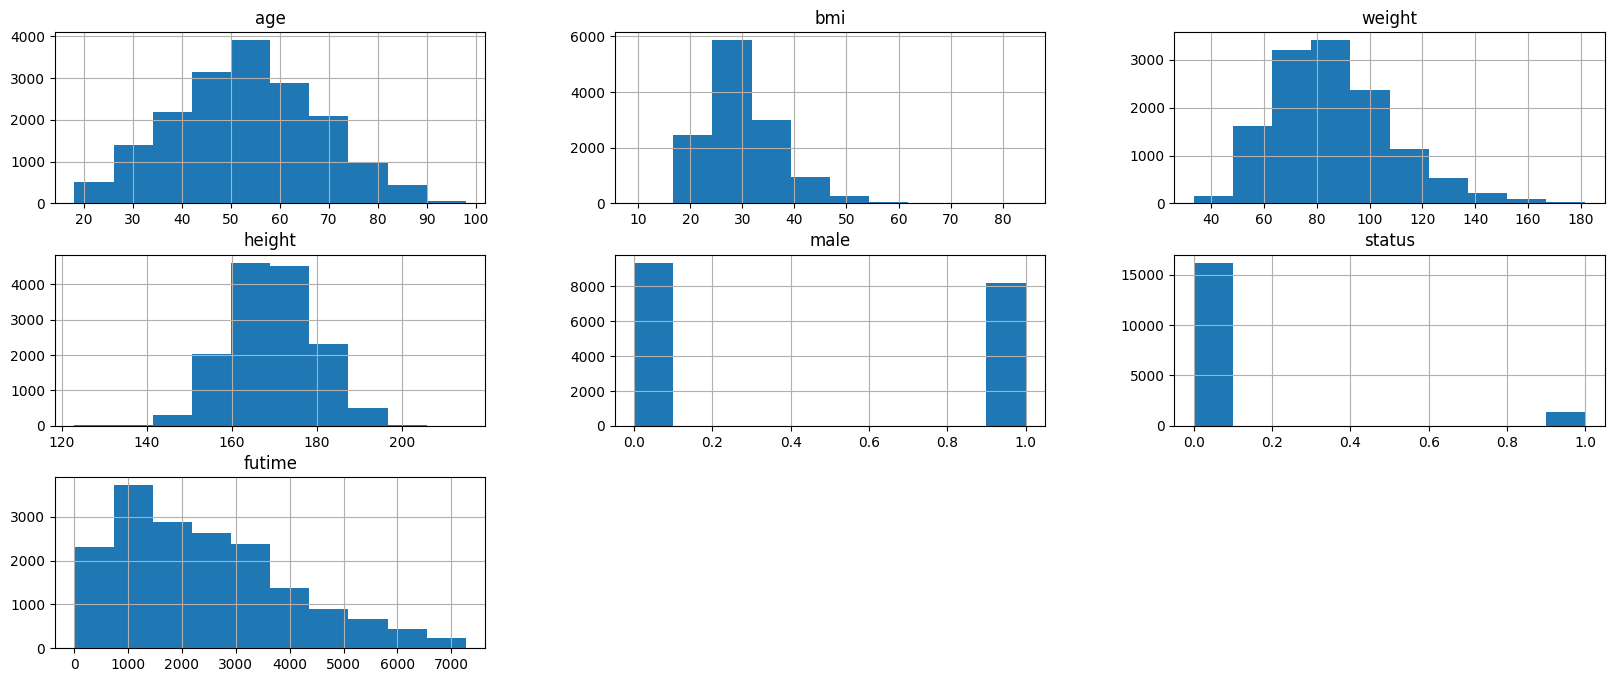

In [ ]:
#Оценим форму распределения в колонках
columns_nafld1_to_plot = ['age', 'bmi', 'weight', 'height', 'male', 'status', 'futime']
df_nafld1[columns_nafld1_to_plot].hist(figsize=(20, 8))

Параметры возраста и веса имеют примерно нормальное распределение. Параметры ИМТ и веса имеют скошенное распределение. Кол-во живых пациентов значительно превышает кол-во умерших пациентов. Кол-во мужчин и женщин примерно одинаково, но женщин немного больше

<Axes: >

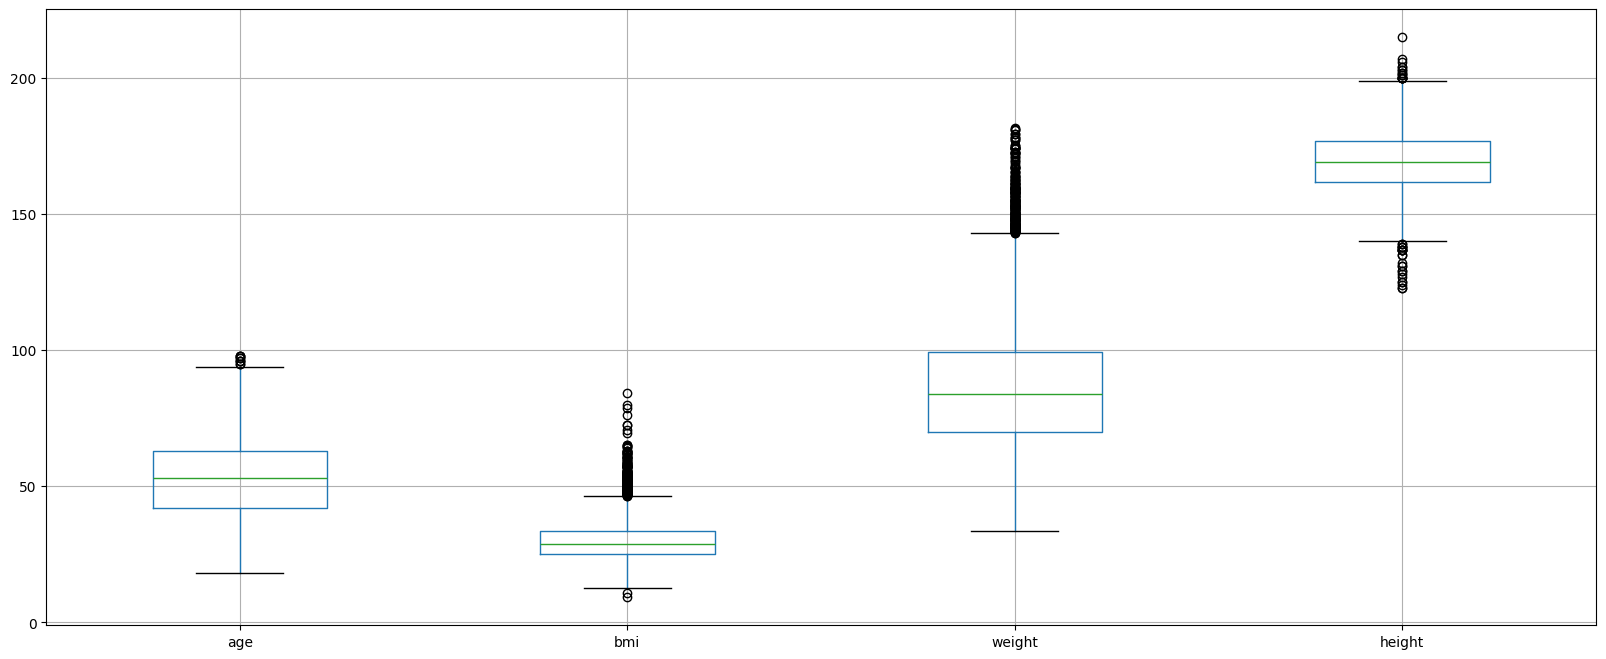

In [ ]:
#Оценим кол-во выбрасов для числовых значений
columns_nafld1_to_plot_2 = ['age', 'bmi', 'weight', 'height']
df_nafld1[columns_nafld1_to_plot_2].boxplot(figsize=(20, 8))

Парметр возраста имеет незначительное кол-во выбрасов. Параметр веса имеет больше кол-во выбрасов в сторону больших значений. Параметр высоты имеет выбрасы в большую и меньшую сторону. Это влияет на выбрасы ИМТ

### Подгрузка и анализ второго датасета

In [ ]:
#подгрузка и изучение второго датасета
df_nafld2 = pd.read_csv('/content/drive/MyDrive/HW Visualization Non-alcohol fatty liver disease (NAFLD) file archive/nafld2.csv')

In [ ]:
display(df_nafld2.head(20))

,Unnamed: 0,id,days,test,value
0,135077,1,-459,hdl,75.0
1,313143,1,-459,chol,75.0
2,135078,1,183,hdl,64.0
3,313144,1,183,chol,64.0
4,135079,1,2030,hdl,74.0
5,313145,1,2030,chol,74.0
6,135080,1,3578,hdl,50.0
7,313146,1,3578,chol,50.0
8,135081,1,5420,hdl,79.0
9,313147,1,5420,chol,79.0


In [ ]:
df_nafld2.shape

(400123, 5)

In [ ]:
df_nafld2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400123 entries, 0 to 400122
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  400123 non-null  int64  
 1   id          400123 non-null  int64  
 2   days        400123 non-null  int64  
 3   test        400123 non-null  object 
 4   value       400123 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 15.3+ MB


In [ ]:
df_nafld2.isna().sum()

,0
Unnamed: 0,0
id,0
days,0
test,0
value,0


In [ ]:
#Оценим, для скольки уникальных пациентов были сделаны различные виды тестов
type_test_nafld2 = df_nafld2.groupby('test')['id'].nunique().reset_index()
type_test_nafld2.columns = ['test', 'unique_id_count']
type_test_nafld2

,test,unique_id_count
0,chol,15204
1,dbp,7484
2,fib4,3688
3,hdl,15205
4,sbp,7484
5,smoke,3303


Проводились следующие виды тестов: \
chol - Холестерин (Cholesterol) \
hdl - Липопротеины высокой плотности (High-Density Lipoprotein) \
sbp - Систолическое артериальное давление (Systolic Blood Pressure) \
dbp - Диастолическое артериальное давление (Diastolic Blood Pressure) \
fib4 - FIBrosis-4 index \
smoke - Курение (Smoking status) \

Наиболее часто проводились тесты на холестерин и ЛВП

In [ ]:
test_stats_nafld2 = df_nafld2.groupby('test')['value'].describe()
test_stats_nafld2

,count,mean,std,min,25%,50%,75%,max
test,,,,,,,,
chol,161258.0,50.683718,15.954062,2.000000,39.000000,48.000000,59.000000,213.000000
dbp,33430.0,136.873377,77.665719,0.000000,122.000000,136.000000,150.000000,13682.000000
fib4,3738.0,3.908221,2.241494,2.670011,2.827286,3.127509,3.934777,26.595286
hdl,161259.0,50.683633,15.954049,2.000000,39.000000,48.000000,59.000000,213.000000
sbp,33430.0,136.873377,77.665719,0.000000,122.000000,136.000000,150.000000,13682.000000
smoke,7008.0,0.409389,0.491756,0.000000,0.000000,0.000000,1.000000,1.000000


В данных есть проблема. Столбцы с идентичными значениями (chol и hdl, dbp и sbp). Физиологически эти параметры должны отличаться, так как они несут разный смысл

In [ ]:
#выведем значения физиологических значений тестов для человека
physio_ranges = pd.DataFrame({
    'test': ['chol', 'hdl', 'sbp', 'dbp', 'fib4'],
    'min_possible': [50, 10, 60, 40, 0.1],
    'lower_normal': [125, 40, 90, 60, 0.0],
    'middle_normal': [162.5, 50, 105, 70, 0.725],
    'upper_normal': [200, 60, 120, 80, 1.45],
    'max_possible': [1000, 100, 250, 150, 10.0],
    'unit': ['mg/dL', 'mg/dL', 'mmHg', 'mmHg', 'index']
})

physio_ranges

,test,min_possible,lower_normal,middle_normal,upper_normal,max_possible,unit
0,chol,50.0,125.0,162.500,200.00,1000.0,mg/dL
1,hdl,10.0,40.0,50.000,60.00,100.0,mg/dL
2,sbp,60.0,90.0,105.000,120.00,250.0,mmHg
3,dbp,40.0,60.0,70.000,80.00,150.0,mmHg
4,fib4,0.1,0.0,0.725,1.45,10.0,index


Если сравнивать с физиологическими показателями нормы и максимально возможного для человека, то, скорее всего, в колонке hdl верные данные, а в колонке chol те же значения скопированы по ошибке. \
Аналогично рассуждая для колонок sbp и dbp придем к выводу, что в колонке sbp значения похожие на верные, а в колонку dbp они скопированы по ошибке

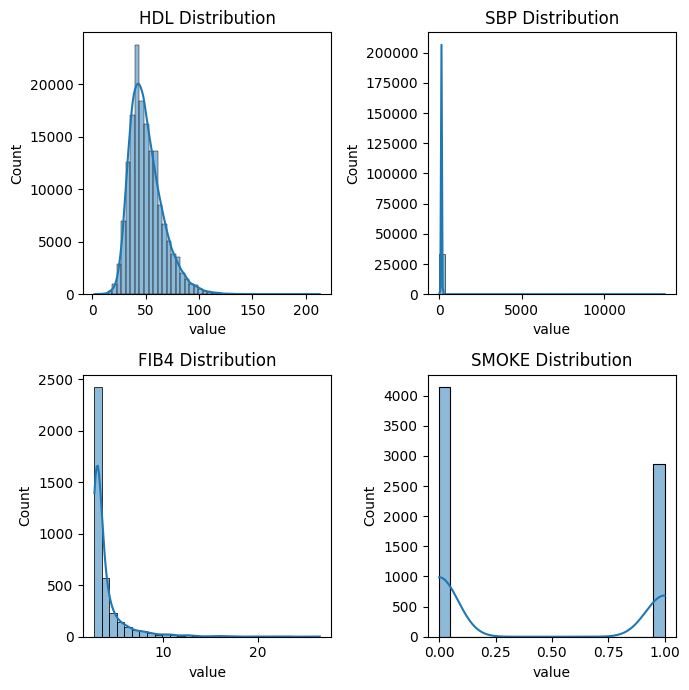

In [ ]:
# Разделяем на группы для лучшего отображения
fig, axes = plt.subplots(2, 2, figsize=(7, 7)) # Changed to 2x2 subplots

#HDL
sns.histplot(df_nafld2[df_nafld2['test'] == 'hdl']['value'],
             ax=axes[0,0], kde=True, bins=50)
axes[0,0].set_title('HDL Distribution') # Corrected indexing

#Давление систолическое
sns.histplot(df_nafld2[df_nafld2['test'] == 'sbp']['value'],
             ax=axes[0,1], kde=True, bins=40)
axes[0,1].set_title('SBP Distribution') # Corrected indexing


#FIB4
sns.histplot(df_nafld2[df_nafld2['test'] == 'fib4']['value'],
             ax=axes[1,0], kde=True, bins=30)
axes[1,0].set_title('FIB4 Distribution') # Corrected indexing
#Smok
sns.histplot(df_nafld2[df_nafld2['test'] == 'smoke']['value'],
             ax=axes[1,1], kde=True, bins=20)
axes[1,1].set_title('SMOKE Distribution') # Corrected indexing

plt.tight_layout()
plt.show()

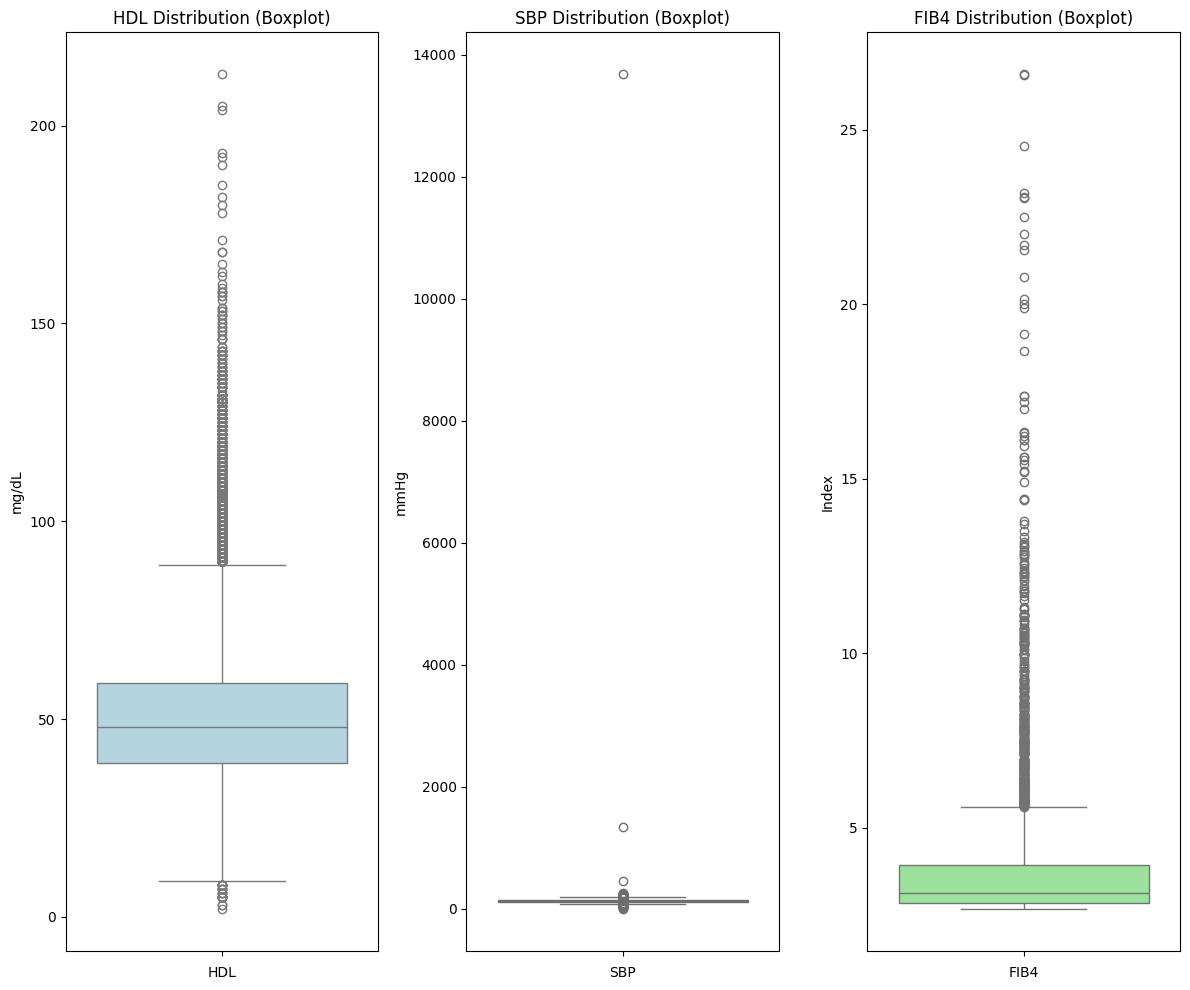

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 10))

# HDL - Boxplot
sns.boxplot(data=df_nafld2[df_nafld2['test'] == 'hdl'],
            y='value', ax=axes[0], color='lightblue')
axes[0].set_title('HDL Distribution (Boxplot)')
axes[0].set_ylabel('mg/dL')
axes[0].set_xlabel('HDL')

# Давление систолическое - Boxplot
sns.boxplot(data=df_nafld2[df_nafld2['test'] == 'sbp'],
            y='value', ax=axes[1], color='lightcoral')
axes[1].set_title('SBP Distribution (Boxplot)')
axes[1].set_ylabel('mmHg')
axes[1].set_xlabel('SBP')

# FIB4 - Boxplot
sns.boxplot(data=df_nafld2[df_nafld2['test'] == 'fib4'],
            y='value', ax=axes[2], color='lightgreen')
axes[2].set_title('FIB4 Distribution (Boxplot)')
axes[2].set_ylabel('Index')
axes[2].set_xlabel('FIB4')


plt.tight_layout()
plt.show()

Наблюдается большое количество выбрасов, которые превосходят физиологически возможный диапазон

### Подгрузка и анализ третьего датасета

In [ ]:
df_nwtco = pd.read_csv('/content/drive/MyDrive/HW Visualization Non-alcohol fatty liver disease (NAFLD) file archive/nwtco.csv')

In [ ]:
display(df_nwtco.head())

,Unnamed: 0,seqno,instit,histol,stage,study,rel,edrel,age,in.subcohort
0,1,1,2,2,1,3,0,6075,25,False
1,2,2,1,1,2,3,0,4121,50,False
2,3,3,2,2,1,3,0,6069,9,False
3,4,4,2,1,4,3,0,6200,28,True
4,5,5,2,2,2,3,0,1244,55,False


In [ ]:
df_nwtco.shape

(4028, 10)

In [ ]:
df_nwtco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4028 entries, 0 to 4027
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    4028 non-null   int64
 1   seqno         4028 non-null   int64
 2   instit        4028 non-null   int64
 3   histol        4028 non-null   int64
 4   stage         4028 non-null   int64
 5   study         4028 non-null   int64
 6   rel           4028 non-null   int64
 7   edrel         4028 non-null   int64
 8   age           4028 non-null   int64
 9   in.subcohort  4028 non-null   bool 
dtypes: bool(1), int64(9)
memory usage: 287.3 KB


In [ ]:
df_nwtco.isna().sum()

,0
Unnamed: 0,0
seqno,0
instit,0
histol,0
stage,0
study,0
rel,0
edrel,0
age,0
in.subcohort,0


In [ ]:
df_nwtco.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4028.0,2025.548411,1173.900596,1.0,1008.75,2022.5,3039.25,4088.0
seqno,4028.0,2025.548411,1173.900596,1.0,1008.75,2022.5,3039.25,4088.0
instit,4028.0,1.100794,0.301094,1.0,1.00,1.0,1.00,2.0
histol,4028.0,1.113952,0.317793,1.0,1.00,1.0,1.00,2.0
stage,4028.0,2.072493,1.037517,1.0,1.00,2.0,3.00,4.0
study,4028.0,3.538977,0.498540,3.0,3.00,4.0,4.00,4.0
rel,4028.0,0.141758,0.348845,0.0,0.00,0.0,0.00,1.0
edrel,4028.0,2276.680238,1640.179134,4.0,856.75,1939.0,3561.00,6209.0
age,4028.0,42.640020,31.177974,0.0,19.00,37.0,58.00,191.0


Третий датасет не содержит пропусков, но у него нет id, чтобы сопоставить с предыдущими двумя. Единственный возможный параметр для сопоставления - возраст

Вывод: \
Подгружены данные из трех датасетов. \
В первом датасете содержится общая информация об испытуемых. Есть пропуски в значениях роста, веса и ИМТ. \
Во вотором датасете содержатся результаты тестов для испытуемых. Есть дублирующиеся колонки и есть большие выбросы в значениях. Первые два датасета можно объединить на основе поля id. \
В третьем датасете нет выбросов и пропусков, но у него нет поля id для однозначного сопоставления с первыми двумя датасетами



## Предобработка данных

Из всех датасетов следует удалить колонку Unnamed: 0 (скорее всего это просто ошибочно считываемое поле из-за неправильного сохранения датасета). \

Из первого датасета уберем значения роста и веса. Они включены в параметр ИМТ, который считается по формуле вес/рост² \
Пропусков ИМТ 28%. Это меньше 30% + для нас это важный параметр, влияющий на тяжесть заболевания. Пропуски можно заполнить медианным значением. Превышения физиологически возможных значений у этого параметра в данных не наблюдается.\

Из второго датасета исключим значения тестов для chol и dbp. Они заполнены некорректными данными и дублируют другие колонки. У тестов fib4, sbp, smoke будут значения менее чем для половины испытуемых. Параметр hdl известен для 15 205 испытуемых из 17 549. \

Изучим закономерность сдачи различных тестов испытуемыми

In [ ]:
# Выбираем нужные колонки из первого датасета
df1_selected = df_nafld1[['id', 'age', 'male', 'bmi', 'case.id', 'futime', 'status']].copy()

In [ ]:
# Сначала посчитаем статистику до фильтрации
original_counts = df_nafld2[df_nafld2['test'].isin(['hdl', 'sbp', 'smoke', 'fib4'])]['test'].value_counts()

# Фильтруем данные
df2_filtered = df_nafld2[df_nafld2['test'].isin(['hdl', 'sbp', 'smoke', 'fib4'])][['id', 'days', 'test', 'value']].copy()

# Сохраняем копию для анализа
df_before_filter = df2_filtered.copy()

# Применяем фильтрацию
df2_filtered = df2_filtered[
    ((df2_filtered['test'] == 'hdl') & (df2_filtered['value'] >= 10.0) & (df2_filtered['value'] <= 100.0)) |
    ((df2_filtered['test'] == 'sbp') & (df2_filtered['value'] >= 60.0) & (df2_filtered['value'] <= 250.0)) |
    ((df2_filtered['test'] == 'fib4') & (df2_filtered['value'] >= 0.1) & (df2_filtered['value'] <= 10.0)) |
    (df2_filtered['test'] == 'smoke')
]

# Анализируем, сколько значений было удалено
filtered_counts = df2_filtered['test'].value_counts()

print("Анализ фильтрации")
for test in ['hdl', 'sbp', 'fib4']:
    original = original_counts.get(test, 0)
    filtered = filtered_counts.get(test, 0)
    removed = original - filtered

    print(f"{test.upper()}:")
    print(f"  Было: {original}")
    print(f"  Стало: {filtered}")
    print(f"  Удалено: {removed} ({removed/original*100:.1f}%)")

Анализ фильтрации
HDL:
  Было: 161259
  Стало: 159804
  Удалено: 1455 (0.9%)
SBP:
  Было: 33430
  Стало: 33413
  Удалено: 17 (0.1%)
FIB4:
  Было: 3738
  Стало: 3633
  Удалено: 105 (2.8%)


In [ ]:
df2_filtered = df2_filtered.drop_duplicates()
total_duplicates = len(df2_filtered) - len(df2_filtered.drop_duplicates())
print(f"Общее количество полных дубликатов: {total_duplicates}")

Общее количество полных дубликатов: 0


In [ ]:
display(df2_filtered.head())

,id,days,test,value
0,1,-459,hdl,75.0
2,1,183,hdl,64.0
4,1,2030,hdl,74.0
6,1,3578,hdl,50.0
8,1,5420,hdl,79.0


Итого мы убрали не лишние колонки, не физиологические значения тестов и сделали проверку на дубликаты

In [ ]:
# Создаем сводную таблицу по наличию тестов у пациентов
test_combinations = df2_filtered.pivot_table(
    index='id',
    columns='test',
    values='value',
    aggfunc='count',
    fill_value=0
)

# Преобразуем в бинарные флаги (0 = нет теста, 1 = есть тест)
test_flags = (test_combinations > 0).astype(int)

# Считаем комбинации (без учета остальных тестов)
results = {
    'hdl_any': len(test_flags[test_flags['hdl'] == 1]),
    'hdl_sbp_any': len(test_flags[(test_flags['hdl'] == 1) & (test_flags['sbp'] == 1)]),
    'hdl_sbp_smoke_any': len(test_flags[(test_flags['hdl'] == 1) & (test_flags['sbp'] == 1) & (test_flags['smoke'] == 1)]),
    'all_four_any': len(test_flags[(test_flags['hdl'] == 1) & (test_flags['sbp'] == 1) & (test_flags['smoke'] == 1) & (test_flags['fib4'] == 1)])
}

# Создаем итоговую таблицу
summary_df = pd.DataFrame({
    'Комбинация тестов': [
        'HDL (любые другие тесты)',
        'HDL + SBP (любые другие тесты)',
        'HDL + SBP + SMOKE (любые другие тесты)',
        'HDL + SBP + SMOKE + FIB4'
    ],
    'Количество пациентов': [
        results['hdl_any'],
        results['hdl_sbp_any'],
        results['hdl_sbp_smoke_any'],
        results['all_four_any']
    ],
    'Процент от всех с HDL': [
        f"{results['hdl_any']/results['hdl_any']*100:.1f}%",
        f"{results['hdl_sbp_any']/results['hdl_any']*100:.1f}%",
        f"{results['hdl_sbp_smoke_any']/results['hdl_any']*100:.1f}%",
        f"{results['all_four_any']/results['hdl_any']*100:.1f}%"
    ]
})

print("СВОДНАЯ ТАБЛИЦА КОМБИНАЦИЙ ТЕСТОВ:")
print("(Учитываются указанные тесты, остальные могут быть любыми)")
display(summary_df)

СВОДНАЯ ТАБЛИЦА КОМБИНАЦИЙ ТЕСТОВ:
(Учитываются указанные тесты, остальные могут быть любыми)


,Комбинация тестов,Количество пациентов,Процент от всех с HDL
0,HDL (любые другие тесты),15174,100.0%
1,HDL + SBP (любые другие тесты),7328,48.3%
2,HDL + SBP + SMOKE (любые другие тесты),1663,11.0%
3,HDL + SBP + SMOKE + FIB4,658,4.3%


У 15 тысяч из 17 тысяч испытуемых есть хотя бы одно измерение теста HDL. \
Одновременно два теста сделало менее половины испытуемых (48%). \
Все четыре интересующих нас теста сдеалали только 4%.
Для исследования каждого признака лучше сделать отдельные датасеты. \
658 человек, для которых мы знаем значение всех 4 признаком можно использовать в качестве Gold Standard Cohort

Теперь объединим данные из двух исходных датасетов (уже предварительно очищенный и отфильтрованных). Из первого датасета возьмем информацию о пользователе и исход. Из второго будем брать последние известные значения тестов (они сильнее всего будут отражать исход). Первый финальный датасет будет содаржать только те строки, где все значения известны (ИМТ + все 4 теста). Второй финальный датасет будет включать в себя строки, где известны ИМТ и HDL.

## Разведывательный анализ данных

Сформулируем гипотезы: \
1. Половые различия значимы и влияют на исход
2. Результаты каждого теста будут коррелировать с исходом
3. Данные из датасета с большим количеством будут лучше коррелировать с общеизвестными данными о заболевании

In [ ]:
# Шаг 1: Фильтрация нужных тестов
filtered_tests = df2_filtered[df2_filtered['test'].isin(['hdl', 'sbp', 'fib4', 'smoke'])]

# Шаг 2: Нахождение строк с минимальным days для каждой пары (id, test)
min_days_idx = filtered_tests.groupby(['id', 'test'])['days'].idxmin()
df2_min_days = filtered_tests.loc[min_days_idx]

# Шаг 3: Создание сводной таблицы
pivot_df = df2_min_days.pivot_table(
    index='id',
    columns='test',
    values='value',
    aggfunc='first'  # берем первое значение (все значения в группе должны быть одинаковыми после фильтрации по min days)
).reset_index()

# Шаг 4: Объединение с df1_selected
final_df = pd.merge(
    df1_selected,
    pivot_df,
    on='id',
    how='left'  # или 'inner' в зависимости от потребности
)

# Переименование колонок для ясности (опционально)
final_df = final_df.rename(columns={
    'hdl': 'hdl_value',
    'sbp': 'sbp_value',
    'fib4': 'fib4_value',
    'smoke': 'smoke_value'
})

In [ ]:
display(final_df.head())

,id,age,male,bmi,case.id,futime,status,fib4_value,hdl_value,sbp_value,smoke_value
0,1,57,0,22.690939,10630.0,6261,0,NaN,75.0,NaN,NaN
1,2,67,0,24.884028,14817.0,624,0,NaN,61.0,NaN,NaN
2,3,53,1,30.453537,3.0,1783,0,NaN,52.0,135.0,NaN
3,4,56,1,37.830100,6628.0,3143,0,4.5542,47.0,142.0,NaN
4,5,68,1,NaN,1871.0,1836,1,NaN,45.0,NaN,NaN


In [ ]:
final_df_gold_cohort = final_df.dropna()
display(final_df_gold_cohort.head())
final_df_gold_cohort.shape

,id,age,male,bmi,case.id,futime,status,fib4_value,hdl_value,sbp_value,smoke_value
56,57,81,0,26.381502,2335.0,3159,1,2.935772,89.0,126.0,0.0
99,100,50,0,30.929878,100.0,5837,0,2.993274,43.0,179.0,0.0
119,120,82,1,31.397360,5658.0,1208,1,4.524974,52.0,145.0,0.0
137,138,69,0,34.018357,138.0,3866,0,3.710927,48.0,136.0,1.0
138,139,74,0,27.912190,290.0,2312,0,3.858265,42.0,148.0,1.0


(604, 11)

final_df_gold_cohort - финальный датасет, где известны все значения. Он имеет всего 604 строки из изначальных 17к

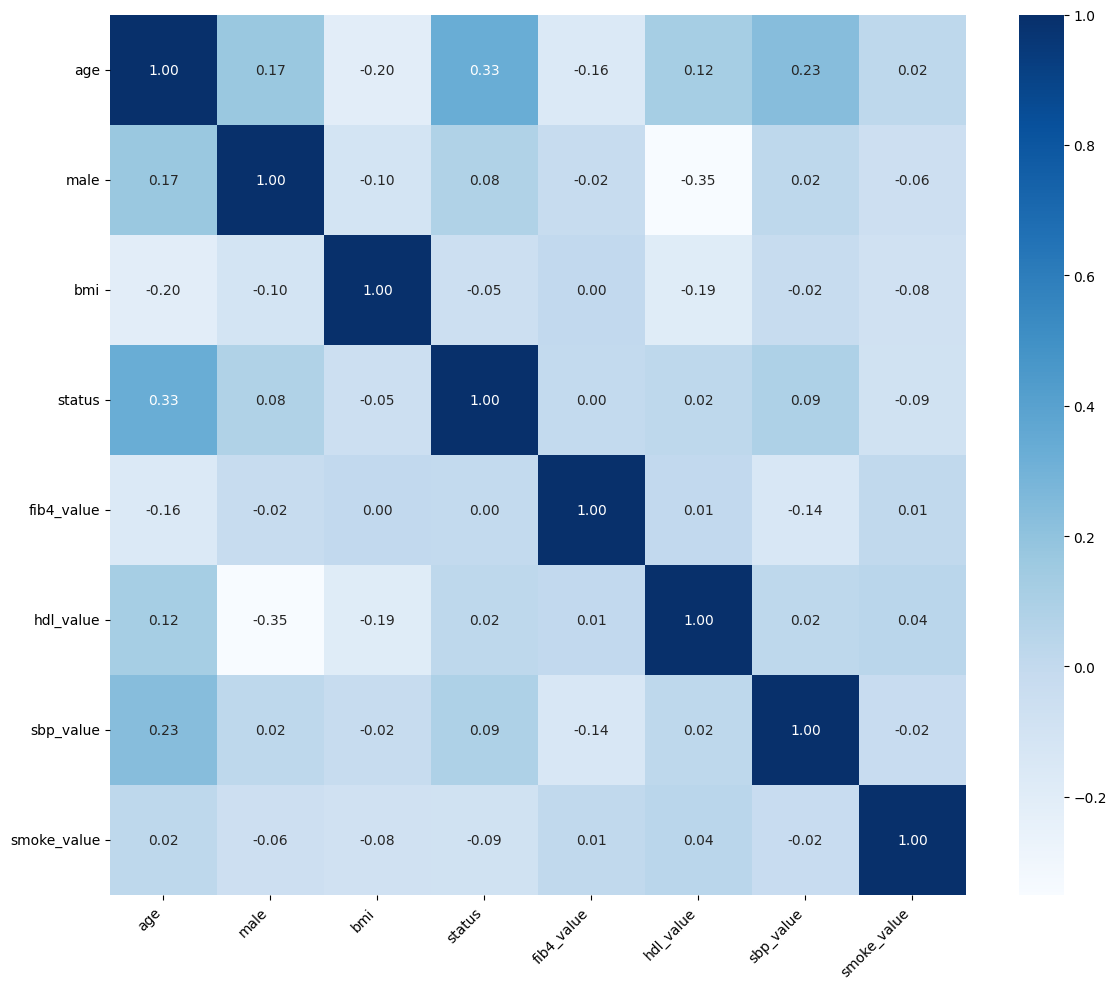

In [ ]:
# Исключаем ненужные колонки
columns_to_exclude = ['id', 'futime', 'case.id']
df_for_corr = final_df_gold_cohort.drop(columns=columns_to_exclude)

# Считаем корреляцию для оставшихся колонок
final_df_gold_cohort_corr = df_for_corr.corr()

# Строим heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(final_df_gold_cohort_corr, cmap="Blues", annot=True, fmt=".2f")
plt.xticks(rotation=45, ha='right')  # Поворачиваем подписи для лучшей читаемости
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Будем считать, что: \
Сильные корреляции (≥ |0.3|) \
Умеренные корреляции (|0.2| - |0.3|) \
Слабые/отсутствующие корреляции (< |0.2|) \

Видим сильную корреляцию возраста и исхода. Это соответствует научным данным. Возраст - основной фактор развития болезни и с возрастом накапливаются повреждения и снижается регенеративная способность печени \
Есть гендерные различия по уровню HDL. Тоже соответствует научным данным, так как у женщин hdl выше из-за уровня эстрогена.\
FIB-4, HDL, SBP слабо связаны с исходом. Это может быть связано с недостаточным размером выборки
Курение не показывает значимых результатов. Возможно, есть проблема в самом параметре (он бинарный). Лучше подошел бы кол-во лет курения

In [ ]:
final_df_bmi_hdl = (final_df
              .dropna(subset=['bmi', 'hdl_value'])
              .drop(columns=['case.id', 'futime', 'fib4_value', 'sbp_value', 'smoke_value', 'id']))

display(final_df_bmi_hdl.head())
final_df_bmi_hdl.shape

,age,male,bmi,status,hdl_value
0,57,0,22.690939,0,75.0
1,67,0,24.884028,0,61.0
2,53,1,30.453537,0,52.0
3,56,1,37.830100,0,47.0
5,39,0,26.615590,0,47.0


(12006, 5)

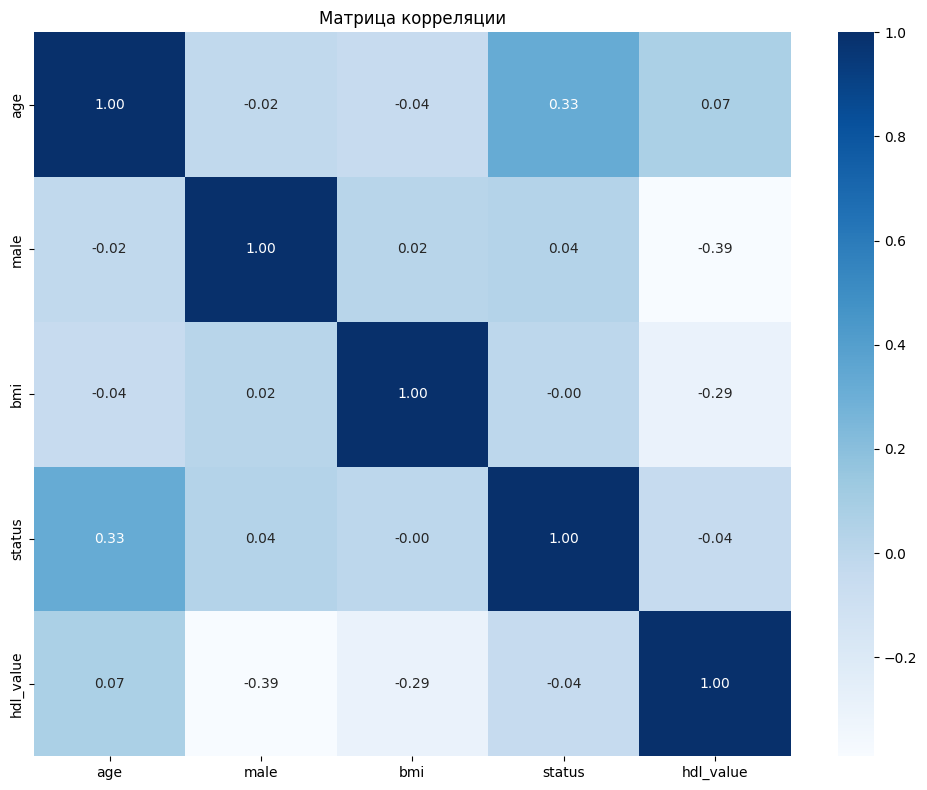

In [ ]:
# Сначала вычисляем матрицу корреляции только для числовых столбцов
correlation_matrix = final_df_bmi_hdl.corr()

# Затем строим heatmap для матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="Blues", annot=True, fmt=".2f")
plt.title('Матрица корреляции')
plt.tight_layout()
plt.show()

Сильные корреляции (≥ |0.3|) \
HDL и мужской пол: -0.39 \
Возраст и статус: 0.33-0.34

Умеренные корреляции (|0.2| - |0.3|) \
HDL и ИМТ: -0.29

Таким образом, в среднем по этому датасету показатели HLD сильнее коррелируют с полом и ИМТ, но корреляция с исходом и возрастом все еще низкая.

Раз этот датасет более информативен, то посроим различные графики зависимостей

<Axes: xlabel='status', ylabel='hdl_value'>

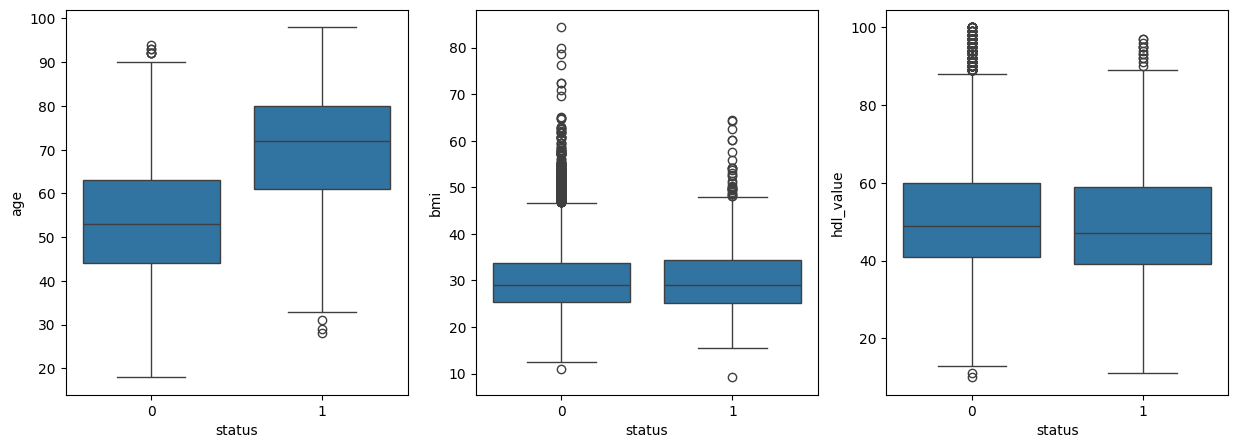

In [ ]:
# Сравнение распределений по исходам
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=final_df_bmi_hdl, x='status', y='age', ax=axes[0])
sns.boxplot(data=final_df_bmi_hdl, x='status', y='bmi', ax=axes[1])
sns.boxplot(data=final_df_bmi_hdl, x='status', y='hdl_value', ax=axes[2])

Видим, что сильнее всего на статус влияет возраст

Text(0.5, 1.0, 'Возраст vs HDL по исходам')

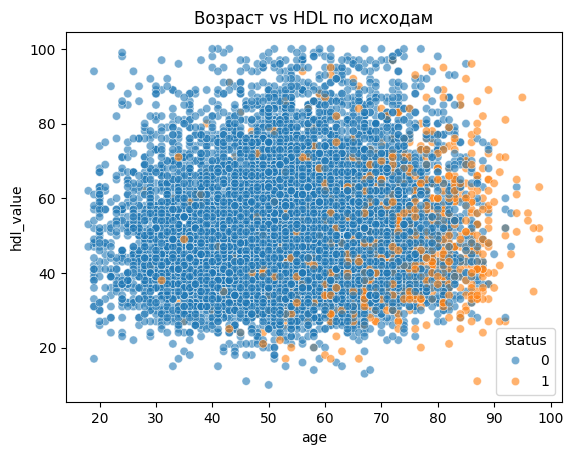

In [ ]:
# Точечные диаграммы с цветом по исходу
sns.scatterplot(data=final_df_bmi_hdl, x='age', y='hdl_value', hue='status', alpha=0.6)
plt.title('Возраст vs HDL по исходам')

Больше всего летальных исходов (оранжевых точек) сконцетрироваео справа внизу, где большой возрасти и низкй hdl

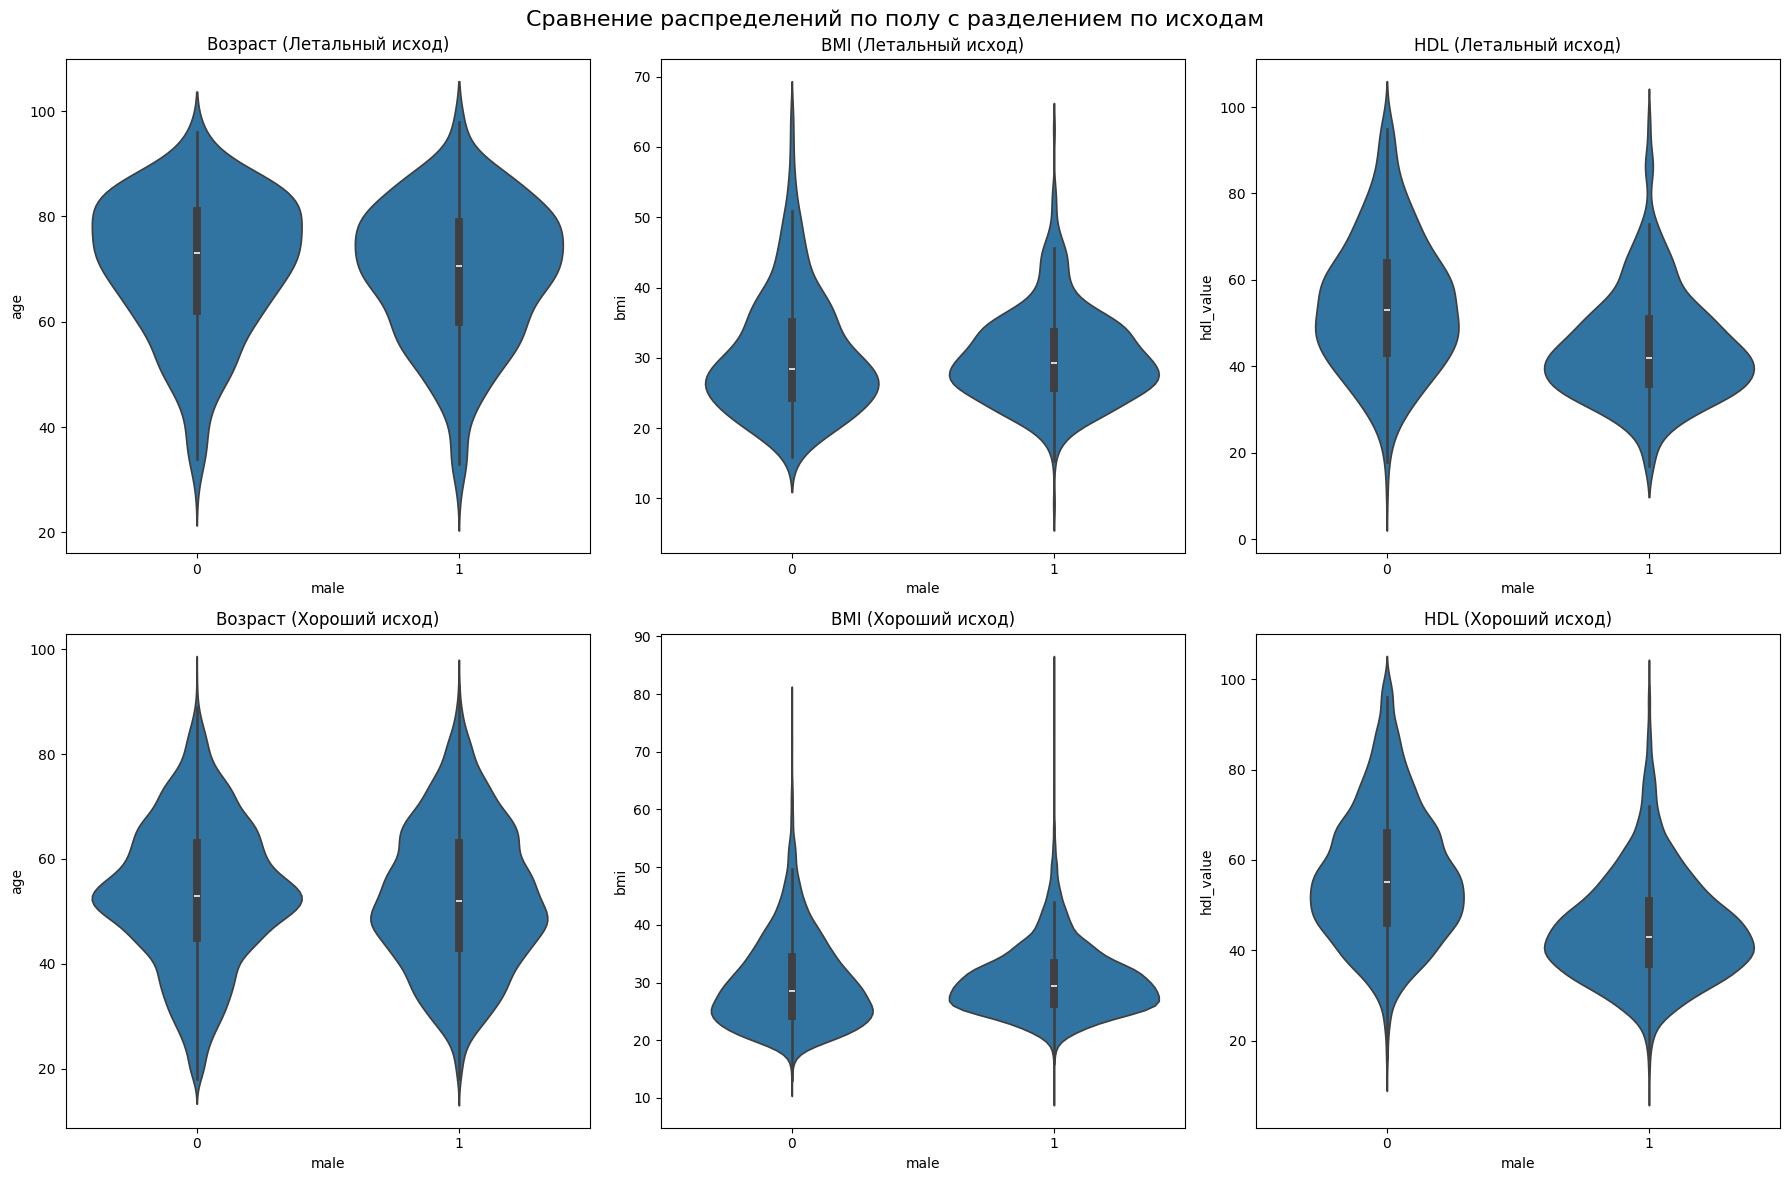

In [ ]:
# Создаем поддатафреймы для каждого исхода
df_status_0 = final_df_bmi_hdl[final_df_bmi_hdl['status'] == 0]  # Хороший исход
df_status_1 = final_df_bmi_hdl[final_df_bmi_hdl['status'] == 1]  # Летальный исход

# Создаем сетку 2x3 графиков
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Верхняя строка - летальный исход (status = 1)
sns.violinplot(data=df_status_1, x='male', y='age', ax=axes[0, 0])
axes[0, 0].set_title('Возраст (Летальный исход)')
sns.violinplot(data=df_status_1, x='male', y='bmi', ax=axes[0, 1])
axes[0, 1].set_title('BMI (Летальный исход)')
sns.violinplot(data=df_status_1, x='male', y='hdl_value', ax=axes[0, 2])
axes[0, 2].set_title('HDL (Летальный исход)')

# Нижняя строка - хороший исход (status = 0)
sns.violinplot(data=df_status_0, x='male', y='age', ax=axes[1, 0])
axes[1, 0].set_title('Возраст (Хороший исход)')
sns.violinplot(data=df_status_0, x='male', y='bmi', ax=axes[1, 1])
axes[1, 1].set_title('BMI (Хороший исход)')
sns.violinplot(data=df_status_0, x='male', y='hdl_value', ax=axes[1, 2])
axes[1, 2].set_title('HDL (Хороший исход)')

# Общий заголовок
plt.suptitle('Сравнение распределений по полу с разделением по исходам', fontsize=16)
plt.tight_layout()
plt.show()

Этот график позволяет сравнить различные показатели по полу и по исходу.
Видно, что в летальном исходе средний возраст выше и у мучжин, и у женщин. При обоих исходах пиковый возраст у мужчин ниже. \
Для ИМТ разброс больше у выжившей группы, так как там больше измерений.
HDL у женщин значительно лучше в обоих группах

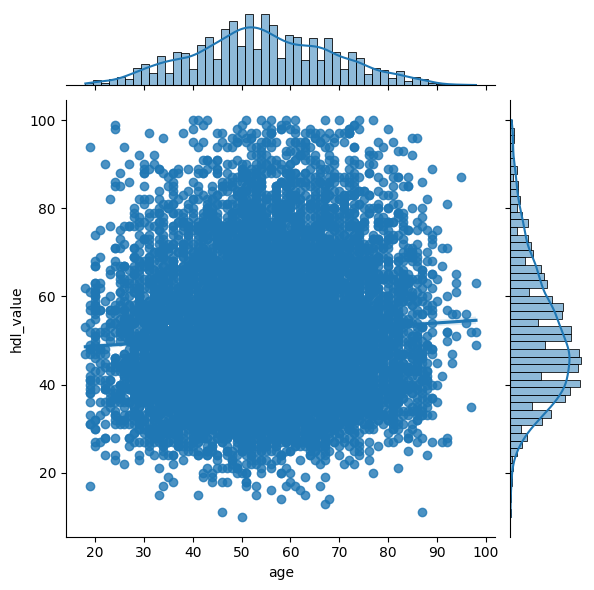

In [ ]:
# Совместное распределение с регрессией
sns.jointplot(data=final_df_bmi_hdl, x='age', y='hdl_value', kind='reg')

Распределения возраста и hdl похоже на нормальное

In [ ]:
fig = px.scatter_3d(final_df_bmi_hdl,
                    x='age',          # Ось X - возраст
                    y='bmi',          # Ось Y - ИМТ
                    z='hdl_value',    # Ось Z - HDL
                    color='status',   # Цвет по исходу (0/1)
                    title='3D визуализация: Возраст, BMI и HDL по исходам',
                    opacity=0.7,
                    height=800)

fig.show()

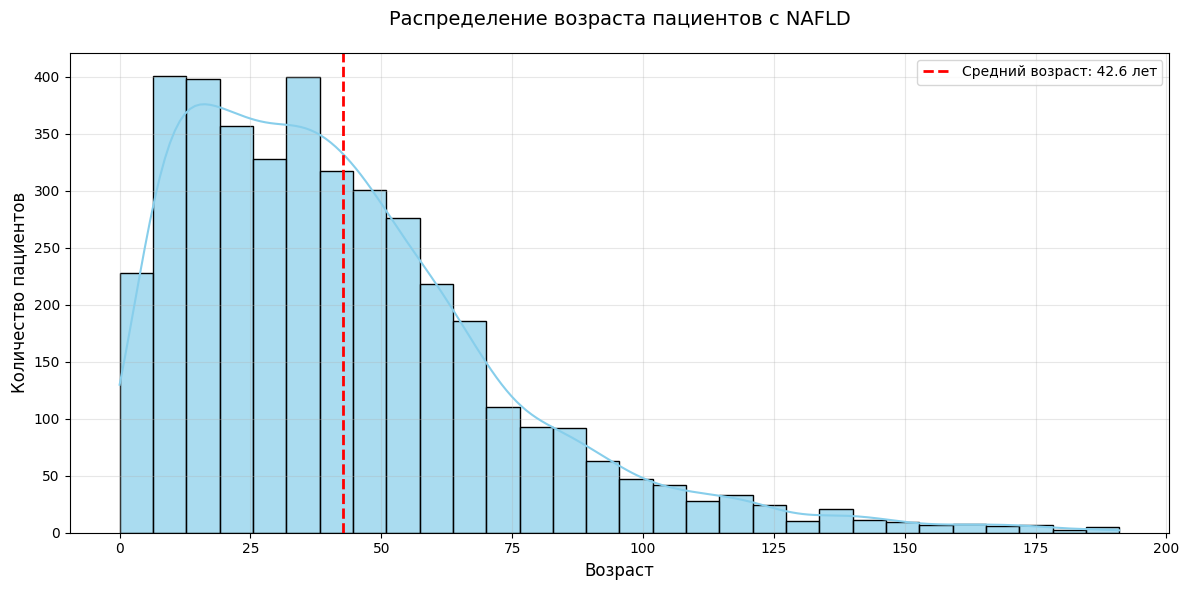

In [ ]:
# Для третьего датасета
# Распределение возраста пациентов
plt.figure(figsize=(12, 6))

# Гистограмма с KDE
sns.histplot(data=df_nwtco, x='age', bins=30, kde=True,
             color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Распределение возраста пациентов с NAFLD', fontsize=14, pad=20)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пациентов', fontsize=12)
plt.grid(True, alpha=0.3)

# Добавляем вертикальную линию для среднего возраста
mean_age = df_nwtco['age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2,
            label=f'Средний возраст: {mean_age:.1f} лет')

plt.legend()
plt.tight_layout()
plt.show()

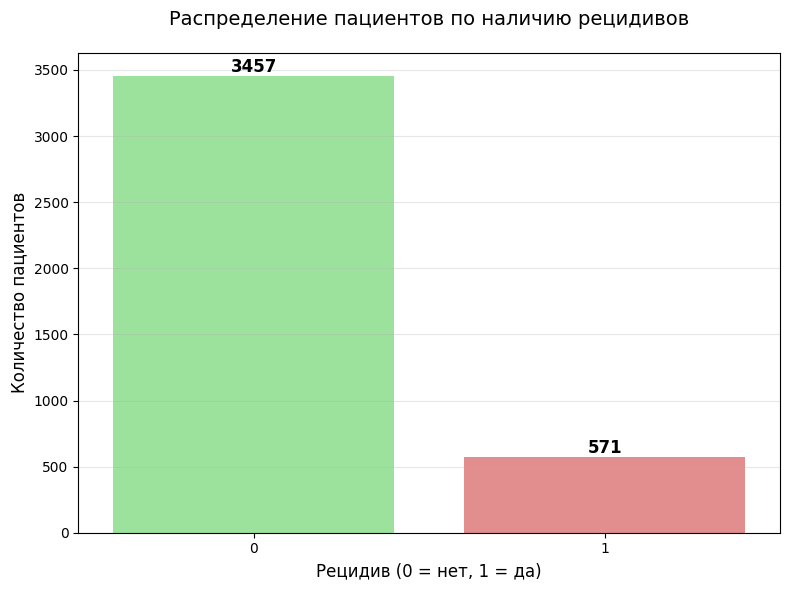

In [ ]:
# Распределение рецидивов и не рецидивов
plt.figure(figsize=(8, 6))

# Создаем countplot для колонки rel
ax = sns.countplot(data=df_nwtco, x='rel', hue='rel', palette={0: 'lightgreen', 1: 'lightcoral'}, legend=False)

plt.title('Распределение пациентов по наличию рецидивов', fontsize=14, pad=20)
plt.xlabel('Рецидив (0 = нет, 1 = да)', fontsize=12)
plt.ylabel('Количество пациентов', fontsize=12)

# Добавляем подписи с количеством над каждым столбцом
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Выводы

Были подгружены 3 датасета. Изучена их структура (информативность, кол-во пропусков). Было составлено два финальных датасета. Они отличались кол-вом строк и колонок. Пустые значения удалялись, так как заполнять пропуски в медицинских данных медианой или средний не корректно.

В первом датасете мы знали все параметры тестов и ИМТ, но строк с заполненными данными было мало (600 из 17к). Из-за малого количества строк была выявлена сильная корреляция исхода только с возрастом и hdl с полом. FIB-4, HDL, SBP эти тесты плохо коррелировали с исходом.

Во втором датасете строк было гораздо больше (12к из 17к), но были оставлены только значения ИМТ и hdl. Информация об остальных тестах стерта. Значения корреляции hdl с другими факторами были сильнее, но закономерности те же.

С помощью библиотек matplotlib, seaborn, plotly были построены графики визуализации. На графиках отчетливо видны различия по возрасту и по полу (по пиковым значениями и по форме распределения)

В третьем датасете большое количество выбросов по возрасту (значений превышают 100 лет). Построен график рецидивов (их 16 процентов). Третий затасет нельзя было связать с предыдущими двумя, так как нет поля id


Результаты гипотиз:

Половые различия значимы и влияют на исход - незначительно \
Результаты каждого теста будут коррелировать с исходом - не каждого \
Данные из датасета с большим количеством будут лучше коррелировать с общеизвестными данными о заболевании - коэффициенто корреляции выше при большем кол-ве, но закономерности те же


